## The Levenshtein distance algorithm

The Levenshtein distance (a.k.a edit distance) is a measure of similarity between two strings. It is defined as the minimum number of changes required to convert string a into string b (this is done by inserting, deleting or replacing a character in string a). The smaller the Levenshtein distance, the more similar the strings are. This is a very common problem in the application of Dynamic Programming.

The approach here is somewhat simple and intuitive. Consider the strings a and b up to their last character:

*   If the last characters of both strings are the same, then the edit distance is equal to the edit distance of the same two strings, up to their second-to-last character.
*   If the last character is different, then the edit distance is equal to the minimum of the cost of inserting, deleting, or replacing the last character of string a.

<div>
<img src='https://blogger.googleusercontent.com/img/a/AVvXsEi_4WW_RawtjhmyBsmys_-myLnDFMXsIqIWxuS3sg49SbQxaOJKxU6V_zUyPfNGG9WUrmMetwiZ17nkLCcD_SdxDBHiIxVNW1hh_DtuwktZvzfIJfvDyLclQY-PP_QvPnMe77Ek4FsHXVr5ijrrgJXNLJ1tqtp4p3EB_1IjcDdP2A2GzroGoVDcPr1C2f47'>
<div>

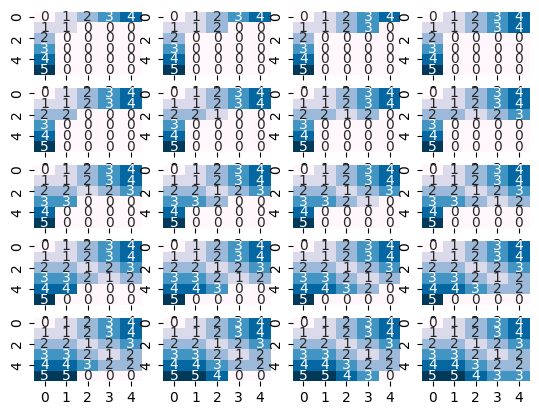

<Figure size 2500x1600 with 0 Axes>

Levenshtein Distance:  3.0


In [15]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Declaring the strings 'a' and 'b':
a = "carry"
b = "bark"

# Declaring array 'D' with rows = len(a) + 1 and columns = len(b) + 1:
D = np.zeros(((len(a) + 1), (len(b) + 1)))

# Initialising first row:
for i in range(len(a) + 1):
    D[i][0] = i

# Initialising first column:
for j in range(len(b) + 1):
    D[0][j] = j

fig, axes=plt.subplots(len(a), len(b))
plt.figure(figsize=(len(a)**2, len(b)**2))

for i in range(1, len(a) + 1):
    for j in range(1, len(b) + 1):
        if a[i - 1] == b[j - 1]:
            D[i][j] = D[i - 1][j - 1]
        else:
            # Adding 1 to account for the cost of operation
            insertion = 1 + D[i][j - 1]
            deletion = 1 + D[i - 1][j]
            replacement = 1 + D[i - 1][j - 1]

            # Choosing the best option:
            D[i][j] = min(insertion, deletion, replacement)
        sns.heatmap(D, annot=True, cbar=False, ax=axes[i-1, j-1], cmap='PuBu')

plt.show()
print("Levenshtein Distance: ", D[len(a)][len(b)])